# 8 лабораторная
Обнаружение и распознование объектво

Датасет обнаружение и распознование ветрогенераторных вышек и тд

Датасет https://www.kaggle.com/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/data

Данный датасет был выбран по причине акутальности и нужности в данном распозновании: для слесарей, работников механиков, для онаружении поломок и несиправностей вышек, быстрый подсчет
объектов и тд

In [1]:
!ls


sample_data


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
!pip install squarify

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kylegraupe/wind-turbine-image-dataset-for-computer-vision")

print("Path to dataset files:", path)

100%|██████████| 617M/617M [00:05<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/versions/12


In [5]:
import shutil
import os

source_dir = "/root/.cache/kagglehub/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision/versions/12"
dest_dir = "/content/lap"

os.makedirs(dest_dir, exist_ok=True)

shutil.copytree(source_dir, dest_dir, dirs_exist_ok=True)

print(f"Датасет скопирован в {dest_dir}")

Датасет скопирован в /content/lap


## Метрики

In [6]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import torch
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
train_images = "lap/train/images"
train_labels = "lap/train/labels"

test_images = "lap/test/images"
test_labels = "lap/test/labels"

val_images = "lap/valid/images"
val_labels = "lap/valid/labels"

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def load_and_visualize_samples(
    images_dir,
    labels_dir,
    num_samples=4,
    grid_size=None,
    figsize=(16, 16),
    box_color=(0, 255, 0),
    box_thickness=3
) -> None:
    image_files = [f for f in os.listdir(images_dir)]

    num_samples = min(num_samples, len(image_files))
    random_images = random.sample(image_files, num_samples)
    if grid_size is None:
        cols = int(np.ceil(np.sqrt(num_samples)))
        rows = int(np.ceil(num_samples / cols))
    else:
        rows, cols = grid_size

    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    axs = axs.ravel() if num_samples > 1 else [axs]

    for i in range(rows * cols):
        ax = axs[i]
        ax.axis('off')

        if i >= num_samples:
            ax.imshow(np.zeros((100, 100, 3)))
            continue

        image_file = random_images[i]
        try:
            image_path = os.path.join(images_dir, image_file)
            image = cv2.imread(image_path)
            label_file = os.path.splitext(image_file)[0] + ".txt"
            label_path = os.path.join(labels_dir, label_file)

            if os.path.exists(label_path):
                image = draw_bounding_boxes(image, label_path, box_color, box_thickness)

            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        except Exception as e:
            print(f"Error processing {image_file}: {str(e)}")

    plt.tight_layout()
    plt.show()


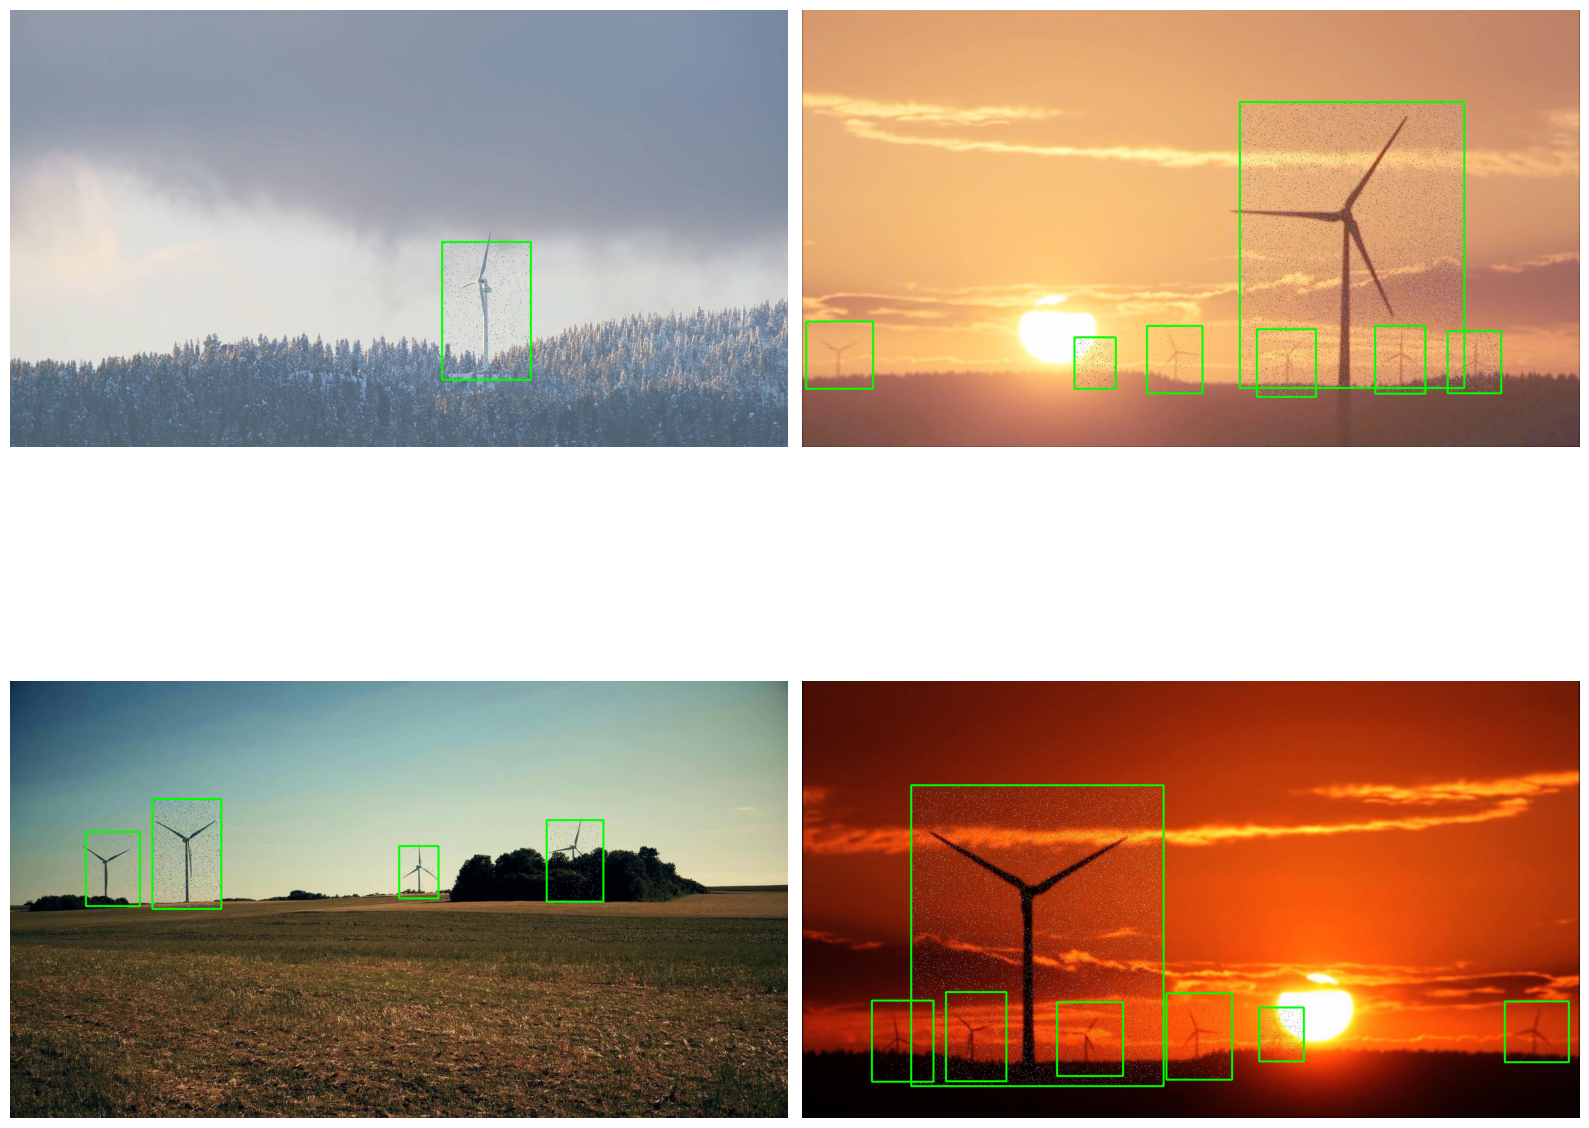

In [ ]:
load_and_visualize_samples(
    images_dir=train_images,
    labels_dir=train_labels,
    num_samples=4
)

In [10]:
image = cv2.imread("./lap/test_lap.jpg")
print(image)

height, width, channels = image.shape
print(f"DIM: {width}x{height} || {channels} channels.")

[[[ 98  76  71]
  [100  78  73]
  [100  78  73]
  ...
  [162 124 112]
  [162 124 112]
  [162 124 112]]

 [[ 96  74  69]
  [ 99  77  72]
  [ 99  77  72]
  ...
  [162 124 112]
  [162 124 112]
  [162 124 112]]

 [[ 95  73  68]
  [ 98  76  71]
  [ 98  76  71]
  ...
  [162 124 112]
  [162 124 112]
  [162 124 112]]

 ...

 [[104  93  89]
  [104  93  89]
  [105  94  90]
  ...
  [111  97  91]
  [110  94  88]
  [108  92  86]]

 [[103  92  88]
  [103  92  88]
  [104  93  89]
  ...
  [111  97  91]
  [111  95  89]
  [108  92  86]]

 [[103  92  88]
  [103  92  88]
  [103  92  88]
  ...
  [112  98  92]
  [111  95  89]
  [109  93  87]]]
DIM: 2048x1365 || 3 channels.


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Метрики

mAP (Mean Average Precision) – главный показатель точности модели. Чем он выше, тем лучше система находит ветряные турбины и правильно определяет их границы

Precision показывает, сколько из обнаруженных объектов действительно являются турбинами. Высокое значение означает, что модель редко путает их с другими объектами (например, с вышками или столбами)

Recall (полнота) отражает, какую долю всех турбин на изображениях модель смогла найти. Если он высокий то значит, система пропускает мало реальных турбин

Метрика mAP50 (B) измеряет среднюю точность модели по разным категориям объектов с порогом пересечения над объединением (IoU) 50%. Более высокий mAP50 означает, что модель лучше точно обнаруживает и локализует объекты по разным категориям.

Метрика mAP50-95 (B) измеряет среднюю точность модели по разным категориям объектов с порогами IoU от 50% до 95%. Более высокий mAP50-95 означает, что модель лучше точно обнаруживает и локализует объекты по разным категориям с более широким диапазоном порогов IoU.

# Создание бейзлайна и оценка качества

In [35]:
model = YOLO('yolo11n.pt')

In [22]:


torch.cuda.empty_cache()
model.train(
    data= '/content/lap/data.yaml',
    epochs=5,
    imgsz=256,
    batch=8,
    workers=2,
    optimizer='SGD',
    lr0=0.01,
    pretrained=True,
    cache='ram',
    device=device,
)

engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/lap/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=True, 

train: Scanning /content/lap/train/labels.cache... 2643 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2643/2643 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.3GB RAM): 100%|██████████| 2643/2643 [00:24<00:00, 110.01it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 698.2±433.2 MB/s, size: 201.9 KB)


val: Scanning /content/lap/valid/labels.cache... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 247/247 [00:01<00:00, 135.90it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.285G      1.599      1.954      1.219         33        256: 100%|██████████| 331/331 [00:37<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.85it/s]


                   all        247       1562      0.836      0.195      0.206     0.0836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.297G      1.257      1.038      1.008         49        256: 100%|██████████| 331/331 [00:34<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

                   all        247       1562       0.52      0.311      0.307       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.297G      1.198      0.898      0.979         41        256: 100%|██████████| 331/331 [00:34<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

                   all        247       1562      0.512       0.43      0.385      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.297G      1.122     0.8088     0.9533         52        256: 100%|██████████| 331/331 [00:34<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.04it/s]

                   all        247       1562       0.53      0.519      0.413      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.297G      1.029     0.7319     0.9263         36        256: 100%|██████████| 331/331 [00:33<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

                   all        247       1562      0.625      0.446      0.463      0.199



5 epochs completed in 0.051 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.4MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]


                   all        247       1562      0.625      0.446      0.463        0.2
           cable tower          7         24      0.517      0.375      0.353      0.115
               turbine        239       1538      0.733      0.517      0.574      0.285
Speed: 0.0ms preprocess, 2.4ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d94d258990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/lap/valid/images/cabletower71_jpg.rf.23a0ef8dade58133602c42586b284843.jpg: 448x640 1 cable tower, 120.7ms
Speed: 16.8ms preprocess, 120.7ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


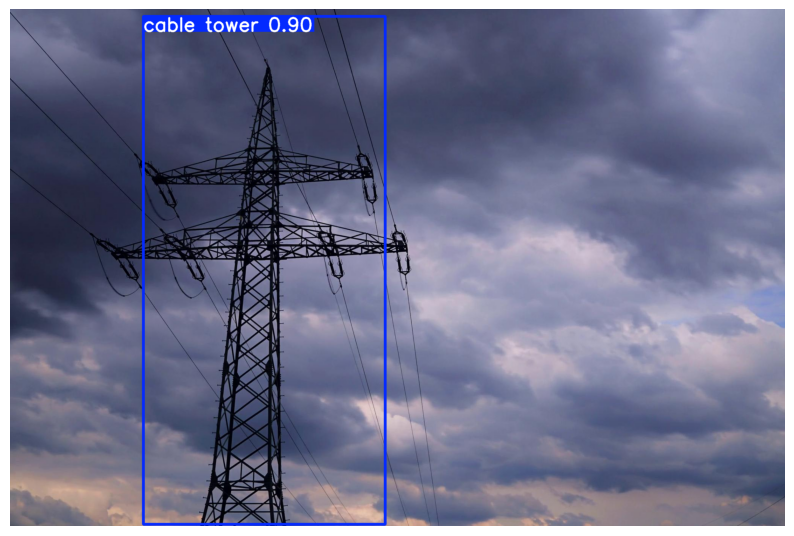

In [72]:


from matplotlib import pyplot as plt

results = model2.predict(source='./lap/valid/images/cabletower71_jpg.rf.23a0ef8dade58133602c42586b284843.jpg', save=False)
annotated_frame = results[0].plot()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [27]:
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1031.2±118.6 MB/s, size: 134.2 KB)


val: Scanning /content/lap/test/labels... 130 images, 2 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 1424.75it/s]

val: New cache created: /content/lap/test/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 130/130 [00:01<00:00, 102.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.95it/s]


                   all        130        752       0.58      0.528      0.557      0.336
           cable tower          6         26       0.33      0.538      0.433      0.273
               turbine        122        726       0.83      0.518      0.681      0.398
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train63


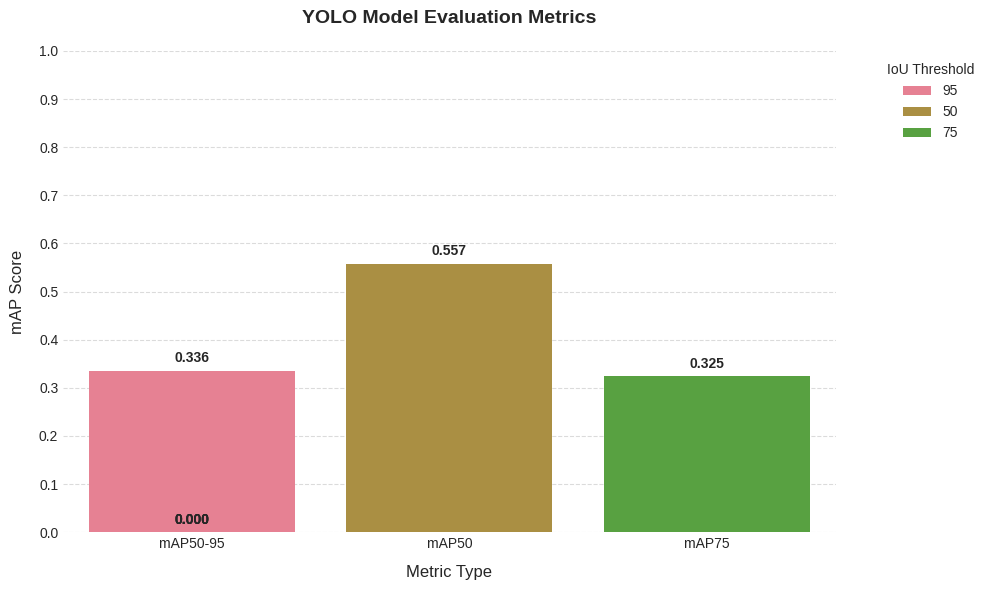

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
metrics_data = {
    'Metric': ['mAP50-95', 'mAP50', 'mAP75'],
    'Value': [metrics.box.map, metrics.box.map50, metrics.box.map75],
    'Threshold': ['95', '50', '75']
}

plt.figure(figsize=(10, 6), dpi=100)
ax = sns.barplot(x='Metric', y='Value', data=metrics_data,
                 hue='Threshold', dodge=False)

plt.title('YOLO Model Evaluation Metrics\n', fontsize=14, fontweight='bold')
plt.xlabel('Metric Type', fontsize=12, labelpad=10)
plt.ylabel('mAP Score', fontsize=12, labelpad=10)
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.1))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

plt.legend(title='IoU Threshold', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.show()

# Улучшение бейзлайна

Ставлю оптимиpатор Adam

Начальный LR уменьшаю

Добавляю аугментации

In [37]:
model2 = YOLO('yolo11n.pt')

In [81]:
torch.cuda.empty_cache()

model2.train(
    data='/content/lap/data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    workers=4,
    optimizer='AdamW',
    lr0=1e-3,
    lrf=1e-4,
    momentum=0.9,
    box=7.5,
    cls=0.5,
    pretrained=True,
    cache='ram',
    device=device,
    augment=True,
    close_mosaic=10
)

engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/lap/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.0001, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.9, mosaic=1.0, multi_scale=False, name=train73, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=Tr

train: Scanning /content/lap/train/labels.cache... 2643 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2643/2643 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.7GB RAM): 100%|██████████| 2643/2643 [00:28<00:00, 92.91it/s] 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 454.0±224.0 MB/s, size: 201.9 KB)


val: Scanning /content/lap/valid/labels.cache... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.2GB RAM): 100%|██████████| 247/247 [00:02<00:00, 120.65it/s]


Plotting labels to runs/detect/train73/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train73
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.22G      1.063     0.8379      1.036         23        640: 100%|██████████| 331/331 [00:54<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]


                   all        247       1562      0.681      0.474      0.557      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.41G     0.7962     0.5149     0.9105         15        640: 100%|██████████| 331/331 [00:52<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.61it/s]

                   all        247       1562      0.646      0.652      0.642      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.42G     0.7592     0.4792     0.8931         29        640: 100%|██████████| 331/331 [00:49<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.20it/s]

                   all        247       1562      0.664      0.574      0.593      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.42G     0.7346     0.4565     0.8873         23        640: 100%|██████████| 331/331 [00:50<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.43it/s]

                   all        247       1562       0.58      0.589      0.574      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.42G     0.7018     0.4385     0.8784          8        640: 100%|██████████| 331/331 [00:50<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]

                   all        247       1562      0.519      0.641      0.577      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.42G     0.6952     0.4261     0.8705         15        640: 100%|██████████| 331/331 [00:58<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.29it/s]

                   all        247       1562      0.577      0.657      0.615      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.42G     0.6654     0.4132     0.8623          2        640: 100%|██████████| 331/331 [00:49<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.46it/s]

                   all        247       1562      0.576      0.574      0.613      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.42G     0.6499     0.4035     0.8574          7        640: 100%|██████████| 331/331 [01:08<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.52it/s]

                   all        247       1562      0.562      0.586      0.599      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.43G     0.6371     0.3937     0.8555          8        640: 100%|██████████| 331/331 [01:02<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.45it/s]

                   all        247       1562      0.604      0.694      0.682      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.44G     0.6275      0.389     0.8512         24        640: 100%|██████████| 331/331 [00:52<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.37it/s]

                   all        247       1562      0.649       0.68      0.669      0.335



10 epochs completed in 0.158 hours.
Optimizer stripped from runs/detect/train73/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train73/weights/best.pt, 5.4MB

Validating runs/detect/train73/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]


                   all        247       1562      0.564      0.715      0.678      0.319
           cable tower          7         24      0.491      0.625      0.557      0.187
               turbine        239       1538      0.637      0.806      0.799      0.451
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train73


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d955f56e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [83]:
metrics = model2.val(conf = 0.25, split = 'test')

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2465.0±268.5 MB/s, size: 193.1 KB)


val: Scanning /content/lap/test/labels.cache... 130 images, 2 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 130/130 [00:01<00:00, 116.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.62it/s]


                   all        130        752      0.586      0.715      0.688      0.392
           cable tower          6         26      0.384      0.766      0.588      0.314
               turbine        122        726      0.787      0.663      0.788       0.47
Speed: 1.3ms preprocess, 9.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train732


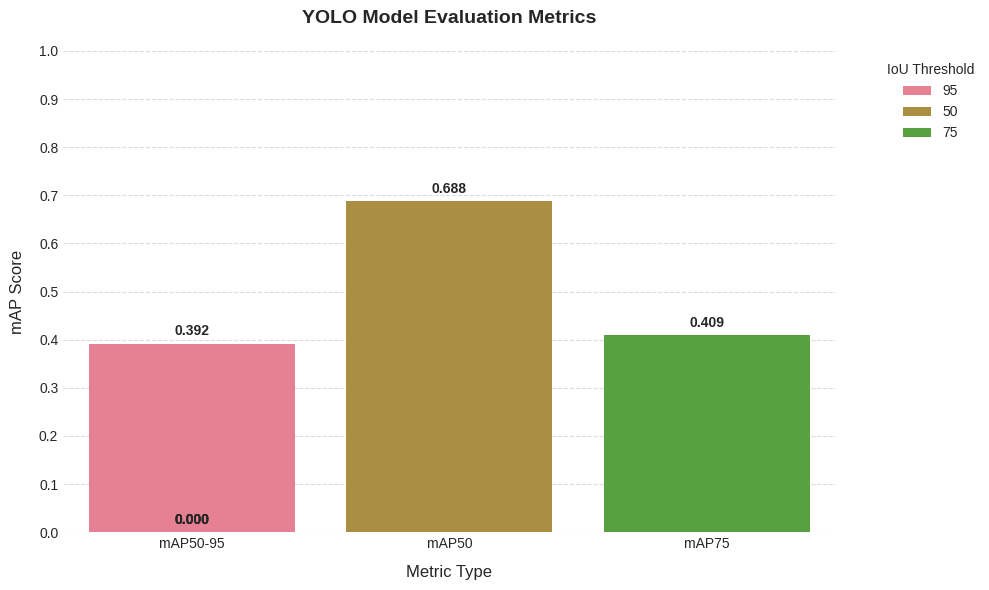

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
metrics_data = {
    'Metric': ['mAP50-95', 'mAP50', 'mAP75'],
    'Value': [metrics.box.map, metrics.box.map50, metrics.box.map75],
    'Threshold': ['95', '50', '75']
}

plt.figure(figsize=(10, 6), dpi=100)
ax = sns.barplot(x='Metric', y='Value', data=metrics_data,
                 hue='Threshold', dodge=False)

plt.title('YOLO Model Evaluation Metrics\n', fontsize=14, fontweight='bold')
plt.xlabel('Metric Type', fontsize=12, labelpad=10)
plt.ylabel('mAP Score', fontsize=12, labelpad=10)
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.1))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

plt.legend(title='IoU Threshold', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.show()


image 1/1 /content/lap/valid/images/windmill18_jpg.rf.2465f72775b82bd3721ab28a6a05b395.jpg: 384x640 2 turbines, 33.6ms
Speed: 2.6ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


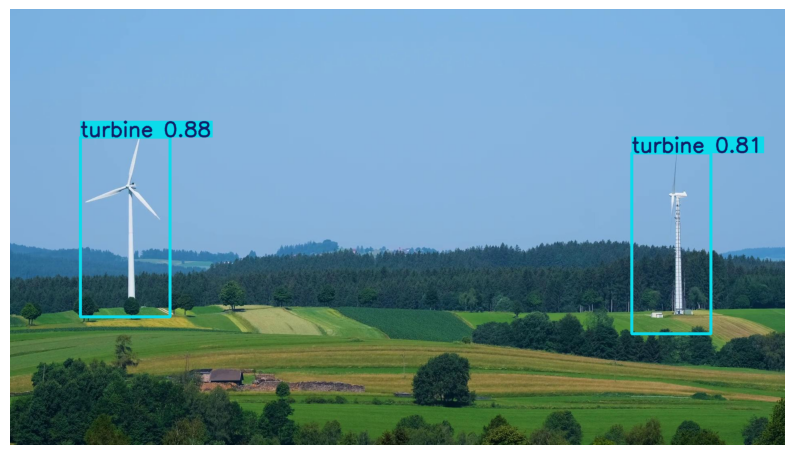

In [85]:
from matplotlib import pyplot as plt

results = model2.predict(
    source='./lap/valid/images/windmill18_jpg.rf.2465f72775b82bd3721ab28a6a05b395.jpg')
annotated_frame = results[0].plot()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Выводы
Как видно, возрос mAP50 при улучшении baseline, да и в целом цифры стали лучше, как видно на примере спокойно находит ветрогенраторные турбины

## Разработка своей реализации

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [122]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 22.9 MB/s eta 0:00:00


In [123]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from torchmetrics.detection import MeanAveragePrecision

+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 1/15    | 5.9756 |          0 |       0 |       0 |
+---------+--------+------------+---------+---------+
+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 2/15    | 1.8019 |          0 |  0.0001 |       0 |
+---------+--------+------------+---------+---------+
+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 3/15    | 1.4818 |          0 |  0.0001 |       0 |
+---------+--------+------------+---------+---------+
+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 4/15    | 1.1061 |        

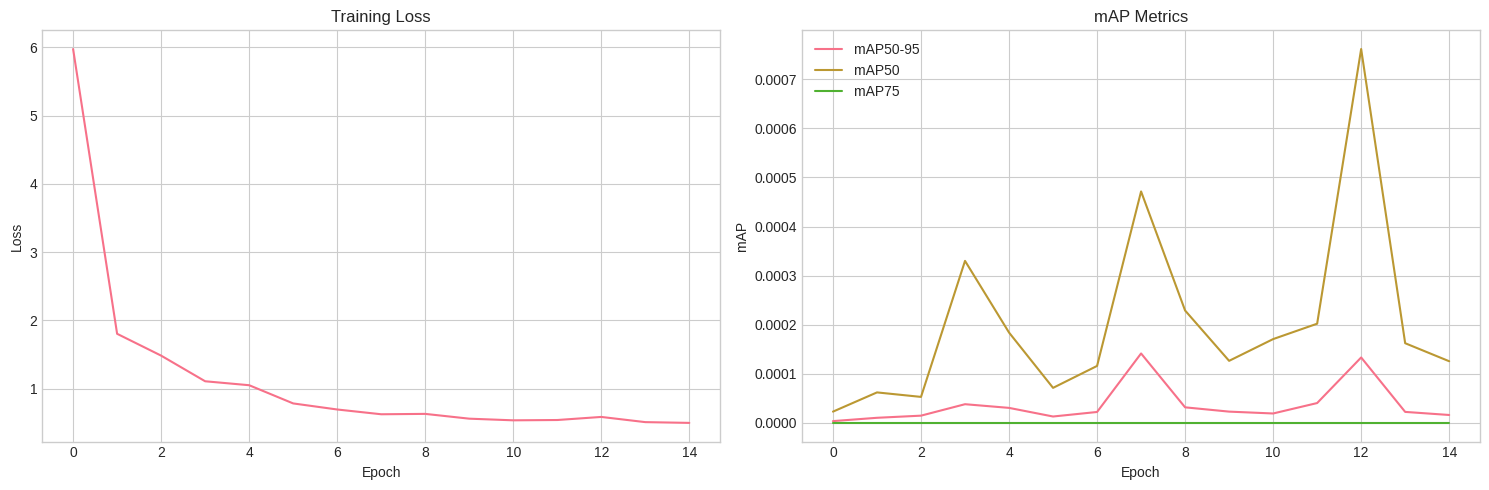


Training summary:
+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 1/15    | 5.9756 |     0      |  0      |       0 |
+---------+--------+------------+---------+---------+
| 2/15    | 1.8019 |     0      |  0.0001 |       0 |
+---------+--------+------------+---------+---------+
| 3/15    | 1.4818 |     0      |  0.0001 |       0 |
+---------+--------+------------+---------+---------+
| 4/15    | 1.1061 |     0      |  0.0003 |       0 |
+---------+--------+------------+---------+---------+
| 5/15    | 1.0481 |     0      |  0.0002 |       0 |
+---------+--------+------------+---------+---------+
| 6/15    | 0.7813 |     0      |  0.0001 |       0 |
+---------+--------+------------+---------+---------+
| 7/15    | 0.6924 |     0      |  0.0001 |       0 |
+---------+--------+------------+---------+---------+
| 8/15    | 0.6225 |     0.0001 |  0.0005 |       0 |
+--------

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import glob
import time
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from torchmetrics.detection import MeanAveragePrecision

class MyDataset(Dataset):
    def __init__(self, images_dir, labels_dir, S=7, num_classes=3, transform=None):
        self.images_paths = sorted(glob.glob(os.path.join(images_dir, '*.jpg')))
        self.labels_paths = [os.path.join(labels_dir, os.path.basename(f).replace('.jpg', '.txt'))
                            for f in self.images_paths]
        self.S = S
        self.num_classes = num_classes
        self.transform = transform if transform is not None else transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.images_paths)

    def __getitem__(self, idx):
        image = Image.open(self.images_paths[idx]).convert('RGB')
        image = self.transform(image)

        target = torch.zeros((self.S, self.S, 5 + self.num_classes), dtype=torch.float)
        label_path = self.labels_paths[idx]

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 5:
                        class_id, cx, cy, bw, bh = map(float, parts)
                        grid_x = int(cx * self.S)
                        grid_y = int(cy * self.S)
                        cell_x = cx * self.S - grid_x
                        cell_y = cy * self.S - grid_y

                        if target[grid_y, grid_x, 4] == 0:
                            target[grid_y, grid_x, 0:4] = torch.tensor([cell_x, cell_y, bw, bh])
                            target[grid_y, grid_x, 4] = 1.0
                            target[grid_y, grid_x, 5 + int(class_id)] = 1.0
        return image, target

class MyDetectionModel(nn.Module):
    def __init__(self, S=7, num_classes=3):
        super().__init__()
        self.S = S
        self.num_classes = num_classes

        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.BatchNorm2d(16), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, stride=2, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * S * S, 1024),
            nn.ReLU(),
            nn.Linear(1024, S * S * (5 + num_classes))
        )

    def forward(self, x):
        x = self.features(x)
        x = self.fc(x)
        return x.view(-1, self.S, self.S, 5 + self.num_classes)

class DetectionLoss(nn.Module):
    def __init__(self, S=7, num_classes=3, lambda_coord=5, lambda_noobj=0.5):
        super().__init__()
        self.S = S
        self.num_classes = num_classes
        self.lambda_coord = lambda_coord
        self.lambda_noobj = lambda_noobj
        self.mse = nn.MSELoss(reduction='sum')
        self.ce = nn.CrossEntropyLoss(reduction='sum')

    def forward(self, predictions, target):
        batch_size = predictions.size(0)
        total_loss = 0.0

        for b in range(batch_size):
            for i in range(self.S):
                for j in range(self.S):
                    pred_cell = predictions[b, i, j]
                    target_cell = target[b, i, j]

                    if target_cell[4] == 1:
                        coord_loss = self.mse(pred_cell[0:4], target_cell[0:4])
                        conf_loss = self.mse(pred_cell[4], target_cell[4])
                        pred_class = pred_cell[5:]
                        target_class = torch.argmax(target_cell[5:]).unsqueeze(0)
                        class_loss = self.ce(pred_class.unsqueeze(0), target_class)
                        total_loss += self.lambda_coord * coord_loss + conf_loss + class_loss
                    else:
                        noobj_loss = self.lambda_noobj * self.mse(pred_cell[4], target_cell[4])
                        total_loss += noobj_loss

        return total_loss / batch_size

def convert_to_coco_format(outputs, targets, S=7, num_classes=3):
    preds = []
    targets_list = []

    for batch_idx in range(outputs.shape[0]):
        pred_boxes = []
        pred_scores = []
        pred_labels = []

        for i in range(S):
            for j in range(S):
                if outputs[batch_idx, i, j, 4] > 0.5:
                    cx = (j + outputs[batch_idx, i, j, 0]) / S
                    cy = (i + outputs[batch_idx, i, j, 1]) / S
                    w = outputs[batch_idx, i, j, 2]
                    h = outputs[batch_idx, i, j, 3]
                    x = cx - w/2
                    y = cy - h/2

                    pred_boxes.append([x, y, w, h])
                    pred_scores.append(outputs[batch_idx, i, j, 4].item())
                    pred_labels.append(torch.argmax(outputs[batch_idx, i, j, 5:]).item())

        target_boxes = []
        target_labels = []

        for i in range(S):
            for j in range(S):
                if targets[batch_idx, i, j, 4] == 1:
                    cx = (j + targets[batch_idx, i, j, 0]) / S
                    cy = (i + targets[batch_idx, i, j, 1]) / S
                    w = targets[batch_idx, i, j, 2]
                    h = targets[batch_idx, i, j, 3]

                    x = cx - w/2
                    y = cy - h/2

                    target_boxes.append([x, y, w, h])
                    target_labels.append(torch.argmax(targets[batch_idx, i, j, 5:]).item())

        preds.append({
            'boxes': torch.tensor(pred_boxes) if pred_boxes else torch.zeros((0, 4)),
            'scores': torch.tensor(pred_scores) if pred_scores else torch.zeros(0),
            'labels': torch.tensor(pred_labels) if pred_labels else torch.zeros(0, dtype=torch.int64)
        })

        targets_list.append({
            'boxes': torch.tensor(target_boxes) if target_boxes else torch.zeros((0, 4)),
            'labels': torch.tensor(target_labels) if target_labels else torch.zeros(0, dtype=torch.int64)
        })

    return preds, targets_list

def train_model(model, dataloader, criterion, optimizer, device, num_epochs=20):
    model.to(device)
    metric = MeanAveragePrecision(iou_type='bbox')

    map_50_95_history = []
    map_50_history = []
    map_75_history = []
    loss_history = []

    headers = ['Epoch', 'Loss', 'mAP50-95', 'mAP50', 'mAP75']
    history = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        metric.reset()

        for images, targets in dataloader:
            images, targets = images.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            with torch.no_grad():
                preds, targets_list = convert_to_coco_format(outputs.sigmoid(), targets)
                metric.update(preds, targets_list)

        map_results = metric.compute()

        map_50_95 = map_results['map'].item()
        map_50 = map_results['map_50'].item()
        map_75 = map_results['map_75'].item()

        map_50_95_history.append(map_50_95)
        map_50_history.append(map_50)
        map_75_history.append(map_75)
        loss_history.append(epoch_loss / len(dataloader))

        history.append([
            f"{epoch+1}/{num_epochs}",
            f"{loss_history[-1]:.4f}",
            f"{map_50_95:.4f}",
            f"{map_50:.4f}",
            f"{map_75:.4f}"
        ])

        print(tabulate([history[-1]], headers=headers, tablefmt='grid'))

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(map_50_95_history, label='mAP50-95')
    plt.plot(map_50_history, label='mAP50')
    plt.plot(map_75_history, label='mAP75')
    plt.title('mAP Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print("\nTraining summary:")
    print(tabulate(history, headers=headers, tablefmt='grid'))

    return model

path = "./lap"
train_images_dir = os.path.join(path, "train/images")
train_labels_dir = os.path.join(path, "train/labels")

S = 7
num_classes = 2
batch_size = 8
num_epochs = 15
learning_rate = 1e-4

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = MyDataset(train_images_dir, train_labels_dir, S=S, num_classes=num_classes, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

model = MyDetectionModel(S=S, num_classes=num_classes)
criterion = DetectionLoss(S=S, num_classes=num_classes)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model = train_model(model, dataloader, criterion, optimizer, device, num_epochs=num_epochs)

torch.save(trained_model.state_dict(), "my_yolo.pth")

## Улучшенный бейзлайн
улучшение функции потерь, изменение некоторых гиперпараметров, улучшению датасета

+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 1/15    | 0.0721 |     0.0008 |  0.0076 |       0 |
+---------+--------+------------+---------+---------+
+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 2/15    | 0.0486 |     0.0109 |  0.0538 |  0.0024 |
+---------+--------+------------+---------+---------+
+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 3/15    | 0.0365 |     0.0228 |  0.0953 |  0.0029 |
+---------+--------+------------+---------+---------+
+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 4/15    | 0.0286 |     0.0

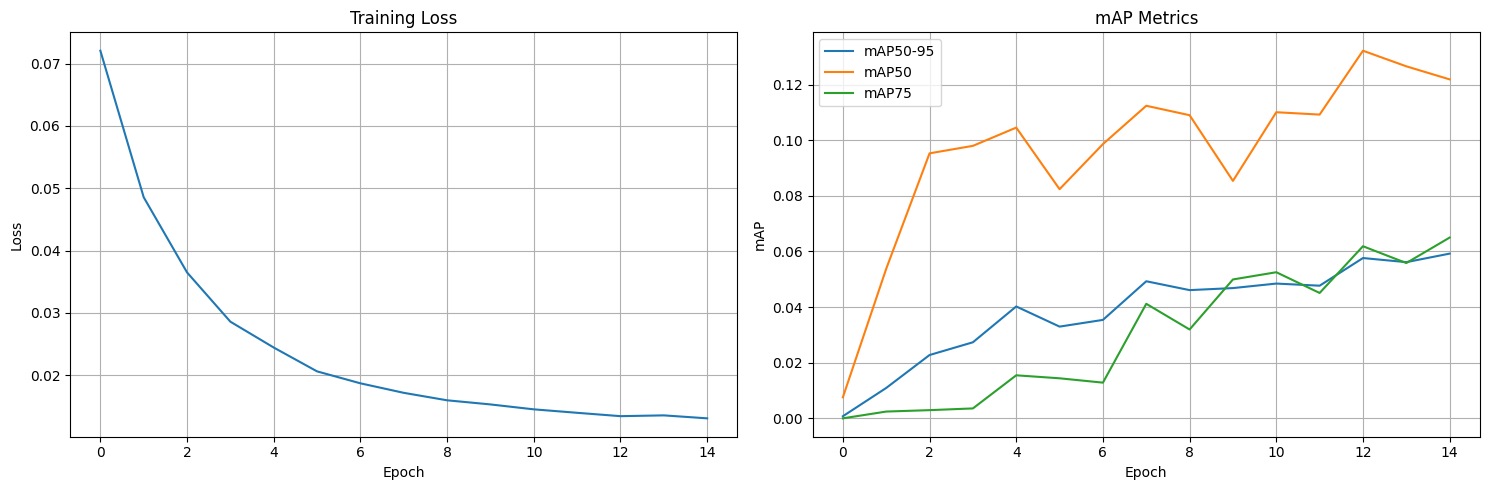


Training summary:
+---------+--------+------------+---------+---------+
| Epoch   |   Loss |   mAP50-95 |   mAP50 |   mAP75 |
+=========+========+============+=========+=========+
| 1/15    | 0.0721 |     0.0008 |  0.0076 |  0      |
+---------+--------+------------+---------+---------+
| 2/15    | 0.0486 |     0.0109 |  0.0538 |  0.0024 |
+---------+--------+------------+---------+---------+
| 3/15    | 0.0365 |     0.0228 |  0.0953 |  0.0029 |
+---------+--------+------------+---------+---------+
| 4/15    | 0.0286 |     0.0273 |  0.098  |  0.0036 |
+---------+--------+------------+---------+---------+
| 5/15    | 0.0244 |     0.0402 |  0.1045 |  0.0155 |
+---------+--------+------------+---------+---------+
| 6/15    | 0.0206 |     0.033  |  0.0824 |  0.0144 |
+---------+--------+------------+---------+---------+
| 7/15    | 0.0187 |     0.0354 |  0.0986 |  0.0128 |
+---------+--------+------------+---------+---------+
| 8/15    | 0.0171 |     0.0493 |  0.1124 |  0.0412 |
+--------

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import glob
import time
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from torchmetrics.detection import MeanAveragePrecision

class MyDataset(Dataset):
    def __init__(self, images_dir, labels_dir, S=7, num_classes=3, transform=None):
        self.images_paths = sorted(glob.glob(os.path.join(images_dir, '*.jpg')))
        self.labels_paths = [os.path.join(labels_dir, os.path.basename(f).replace('.jpg', '.txt'))
                            for f in self.images_paths]
        self.S = S
        self.num_classes = num_classes
        self.transform = transform if transform is not None else transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.images_paths)

    def __getitem__(self, idx):
        image = Image.open(self.images_paths[idx]).convert('RGB')
        image = self.transform(image)

        target = torch.zeros((self.S, self.S, 5 + self.num_classes), dtype=torch.float)
        label_path = self.labels_paths[idx]

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 5:
                        class_id, cx, cy, bw, bh = map(float, parts)
                        grid_x = int(cx * self.S)
                        grid_y = int(cy * self.S)
                        cell_x = cx * self.S - grid_x
                        cell_y = cy * self.S - grid_y

                        if target[grid_y, grid_x, 4] == 0:
                            target[grid_y, grid_x, 0:4] = torch.tensor([cell_x, cell_y, bw, bh])
                            target[grid_y, grid_x, 4] = 1.0
                            target[grid_y, grid_x, 5 + int(class_id)] = 1.0
        return image, target

class MyDetectionModel(nn.Module):
    def __init__(self, S=7, num_classes=3):
        super().__init__()
        self.S = S
        self.num_classes = num_classes

        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.BatchNorm2d(16), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, stride=2, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * S * S, 1024),
            nn.ReLU(),
            nn.Linear(1024, S * S * (5 + num_classes))
        )

    def forward(self, x):
        x = self.features(x)
        x = self.fc(x)
        return x.view(-1, self.S, self.S, 5 + self.num_classes)

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, input, target):
        cross_entropy = nn.CrossEntropyLoss(reduction='none')(input, target)
        loss = self.alpha * (1 - torch.exp(-cross_entropy)) ** self.gamma * cross_entropy
        if self.reduction == 'mean':
            return loss.mean()
        else:
            return loss.sum()

def convert_to_coco_format(outputs, targets, S=7, num_classes=3):
    preds = []
    targets_list = []

    for batch_idx in range(outputs.shape[0]):
        pred_boxes = []
        pred_scores = []
        pred_labels = []

        for i in range(S):
            for j in range(S):
                if outputs[batch_idx, i, j, 4] > 0.1:
                    cx = (j + outputs[batch_idx, i, j, 0]) / S
                    cy = (i + outputs[batch_idx, i, j, 1]) / S
                    w = outputs[batch_idx, i, j, 2]
                    h = outputs[batch_idx, i, j, 3]
                    x = cx - w/2
                    y = cy - h/2

                    pred_boxes.append([x, y, w, h])
                    pred_scores.append(outputs[batch_idx, i, j, 4].item())
                    pred_labels.append(torch.argmax(outputs[batch_idx, i, j, 5:]).item())

        target_boxes = []
        target_labels = []

        for i in range(S):
            for j in range(S):
                if targets[batch_idx, i, j, 4] == 1:
                    cx = (j + targets[batch_idx, i, j, 0]) / S
                    cy = (i + targets[batch_idx, i, j, 1]) / S
                    w = targets[batch_idx, i, j, 2]
                    h = targets[batch_idx, i, j, 3]

                    x = cx - w/2
                    y = cy - h/2

                    target_boxes.append([x, y, w, h])
                    target_labels.append(torch.argmax(targets[batch_idx, i, j, 5:]).item())

        preds.append({
            'boxes': torch.tensor(pred_boxes) if pred_boxes else torch.zeros((0, 4)),
            'scores': torch.tensor(pred_scores) if pred_scores else torch.zeros(0),
            'labels': torch.tensor(pred_labels) if pred_labels else torch.zeros(0, dtype=torch.int64)
        })

        targets_list.append({
            'boxes': torch.tensor(target_boxes) if target_boxes else torch.zeros((0, 4)),
            'labels': torch.tensor(target_labels) if target_labels else torch.zeros(0, dtype=torch.int64)
        })

    return preds, targets_list

def train_model(model, dataloader, criterion, optimizer, device, num_epochs=20):
    model.to(device)
    metric = MeanAveragePrecision(iou_type='bbox')

    map_50_95_history = []
    map_50_history = []
    map_75_history = []
    loss_history = []

    headers = ['Epoch', 'Loss', 'mAP50-95', 'mAP50', 'mAP75']
    history = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        metric.reset()

        for images, targets in dataloader:
            images, targets = images.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            with torch.no_grad():
                preds, targets_list = convert_to_coco_format(outputs.sigmoid(), targets)
                metric.update(preds, targets_list)

        map_results = metric.compute()

        map_50_95 = map_results['map'].item() * 100
        map_50 = map_results['map_50'].item() * 100
        map_75 = map_results['map_75'].item() * 100

        map_50_95_history.append(map_50_95)
        map_50_history.append(map_50)
        map_75_history.append(map_75)
        loss_history.append(epoch_loss / len(dataloader))

        history.append([
            f"{epoch+1}/{num_epochs}",
            f"{loss_history[-1]:.4f}",
            f"{(map_50_95):.4f}",
            f"{(map_50):.4f}",
            f"{(map_75):.4f}"
        ])

        print(tabulate([history[-1]], headers=headers, tablefmt='grid'))

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(map_50_95_history, label='mAP50-95')
    plt.plot(map_50_history, label='mAP50')
    plt.plot(map_75_history, label='mAP75')
    plt.title('mAP Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print("\nTraining summary:")
    print(tabulate(history, headers=headers, tablefmt='grid'))

    return model

path = "./lap"
train_images_dir = os.path.join(path, "train/images")
train_labels_dir = os.path.join(path, "train/labels")

S = 7
num_classes = 2
batch_size = 8
num_epochs = 15
learning_rate = 1e-4

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = MyDataset(train_images_dir, train_labels_dir, S=S, num_classes=num_classes, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

model = MyDetectionModel(S=S, num_classes=num_classes)
criterion = FocalLoss(alpha=0.25, gamma=2.0, reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=1e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model = train_model(model, dataloader, criterion, optimizer, device, num_epochs=num_epochs)

torch.save(trained_model.state_dict(), "my_yolo.pth")

# Выводы
Собственная реализация с обычным бейзлайном показала себя плохо, однако при улучшении функции потерь, изменению некоторых гиперпараметров, улучшению датасета, на улучшеном безлайне наблюдает сильные улучшения и в вфункции потерь и в mAP-50